In [1]:
import pandas as pd
import seaborn as sns

In [2]:
raw_data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
raw_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
raw_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

The DataFrame showed that the Serial No. column has no meaning to the prediction.

In [5]:
raw_data.drop('Serial No.', axis=1, inplace=True) 

In [6]:
raw_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Exploratory Data Analysis

In [7]:
raw_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


All of the features are numeric features.

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


There is no missing value in every column. 4 columns are integers and 4 columns are floats.

## Correlation

In [9]:
raw_data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


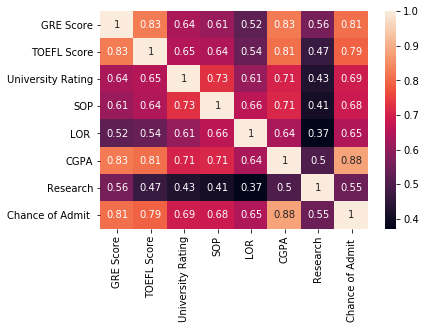

In [10]:
sns.heatmap(raw_data.corr(), annot=True);

3 columns have a high correlation to the target label (approximately above 75%).

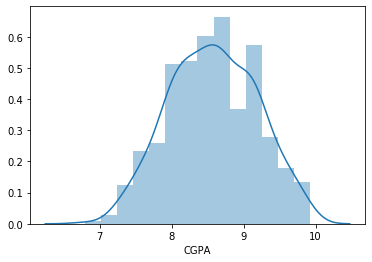

In [11]:
sns.distplot(raw_data['CGPA']);

CGPA column follows the normal distribution.

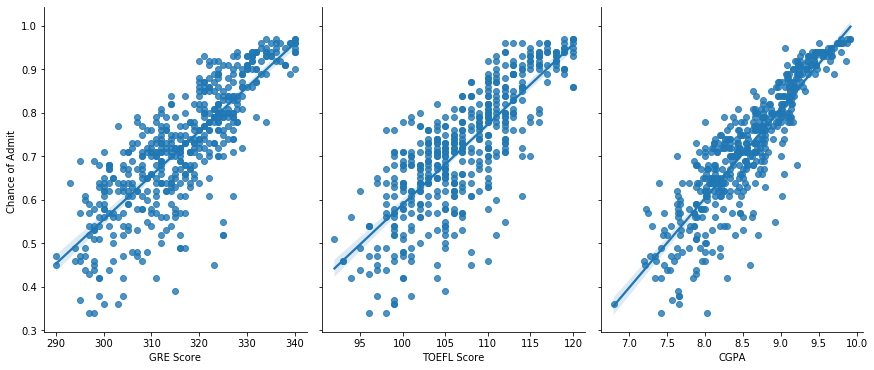

In [12]:
sns.pairplot(raw_data, x_vars=['GRE Score', 'TOEFL Score', 'CGPA'], y_vars='Chance of Admit ', height=5, aspect=0.8, kind='reg');

The top 3 high correlated columns  have a linear relationship with the target label as well.

# Modeling

The observation above shown that some features have a linear relationship and highly correlated with the target label so that LinearRegression model is used.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [14]:
X = raw_data[['GRE Score', 'TOEFL Score', 'CGPA']]
y = raw_data['Chance of Admit ']

## Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X_train.head()

,GRE Score,TOEFL Score,CGPA
107,338,117,9.46
336,319,110,8.79
71,336,112,9.76
474,308,105,7.95
6,321,109,8.20


## Fitting Model

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = lin_reg.predict(X_test)

In [19]:
y_pred[:5]

array([0.62802152, 0.83209435, 0.79119818, 0.85046086, 0.60222891])

In [20]:
y_test.to_numpy()[:5]

array([0.64, 0.85, 0.8 , 0.91, 0.68])

The predicted values are so close to true values.

# Scoring

In [21]:
lin_reg.score(X_train, y_train)

0.8122343451664387

In [22]:
lin_reg.score(X_test, y_test)

0.7632878240069341

In [23]:
mean_absolute_error(y_test, y_pred)

0.04688621359385712